In [ ]:
#Description: This program detects breast cancer, based off of data.

In [ ]:
# Loading Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(7)

Saving data.csv to data.csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [ ]:
# Count the number of rows and columns
df.shape

(569, 33)

In [ ]:
# count Nan
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# drop the column
df=df.dropna(axis=1)

In [ ]:
df.shape

(569, 32)

In [ ]:
# get a count of number of malignant or benign cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


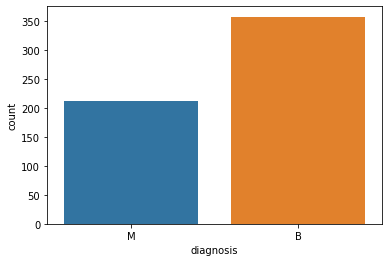

In [ ]:
# visulaize the count
sns.countplot(df['diagnosis'], label='count')

In [ ]:
# look at the data types of columns
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# Encode the categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

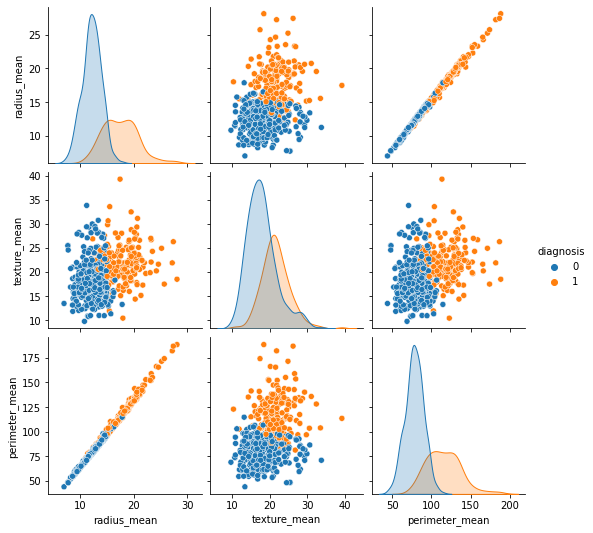

In [ ]:
# Create a pair plot
sns.pairplot(df.iloc[:,1:5], hue='diagnosis')

In [ ]:
# print the first 5 rows of the new data
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#get the correlation of the columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


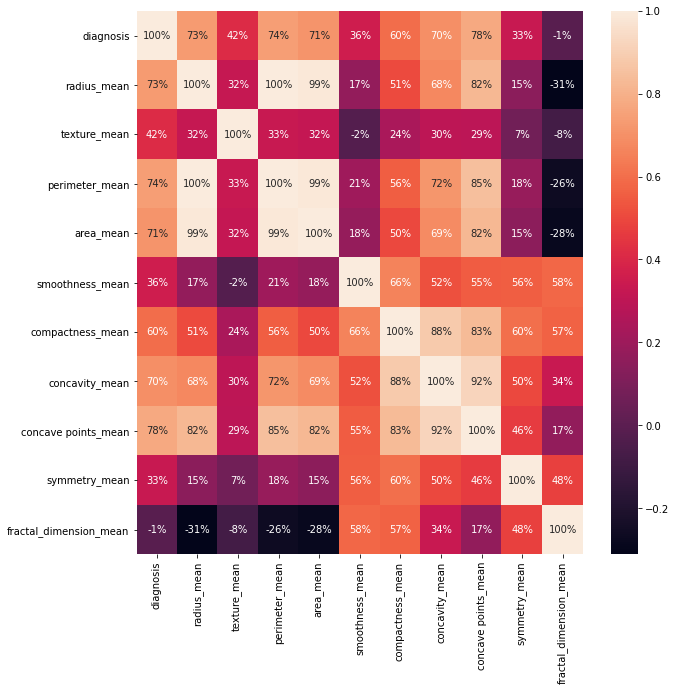

In [ ]:
#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

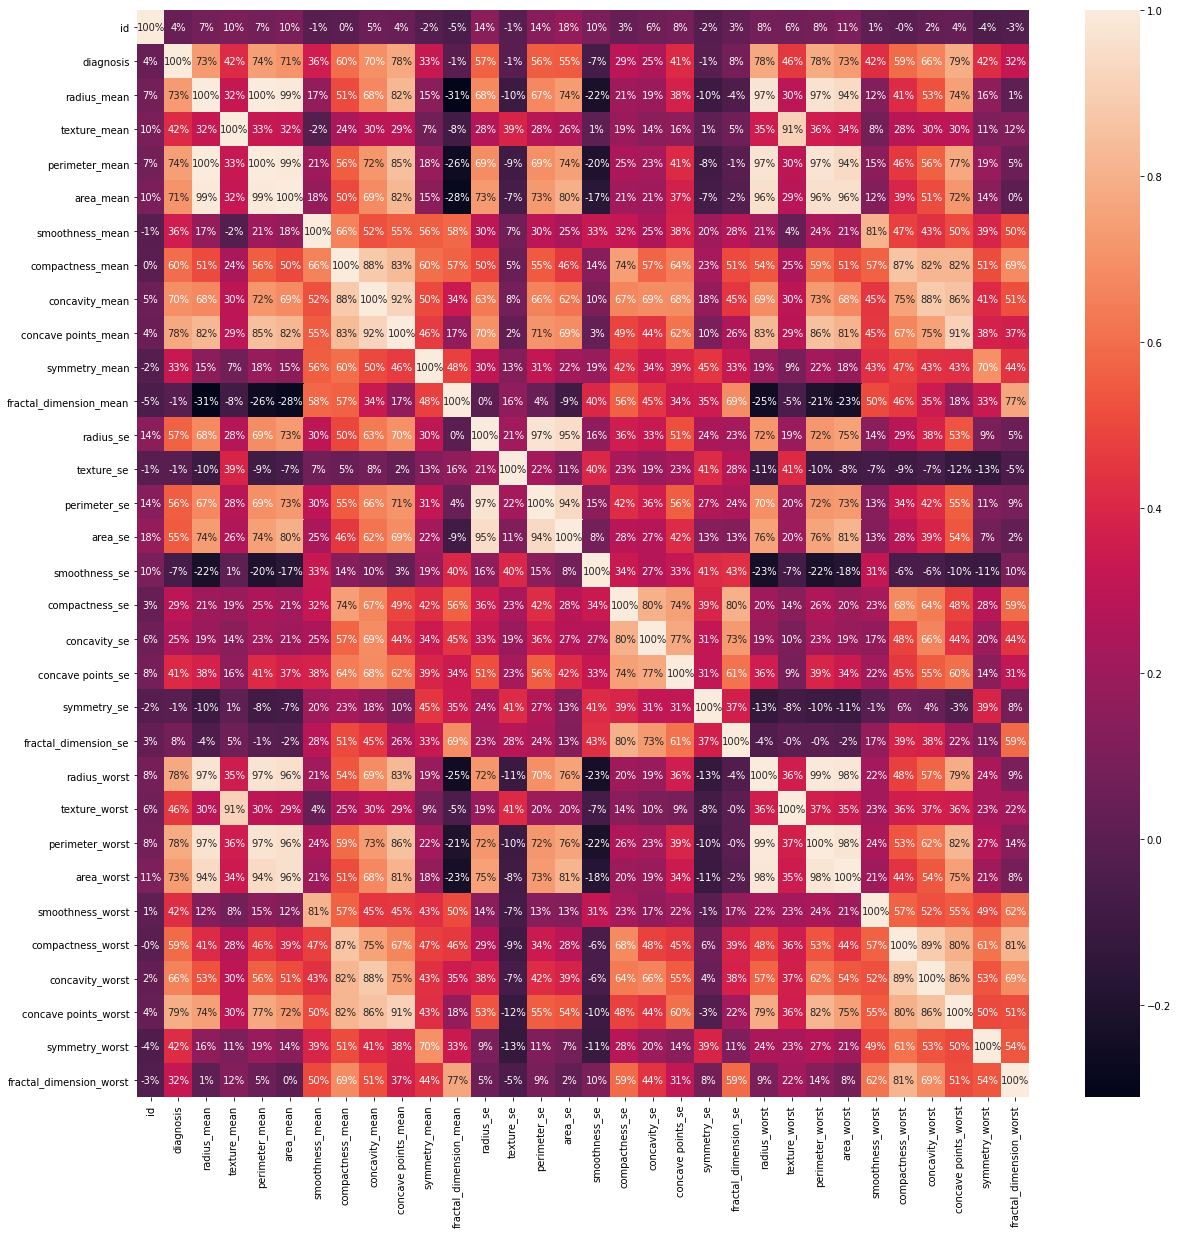

In [ ]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [ ]:
# Split the dataset into independent (X) dependent (Y) data sets
X = df.iloc[:,2:31].values
Y = df.iloc[:,1].values

In [ ]:
# Splitting the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [ ]:
# Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Create a function for the models
import time
def models(X_train, Y_train):

  # Logistic Regression
  t0 = time.time()
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)
  t1 = time.time()
  print("Time taken by Logistic Regression - {:.2} s".format(t1 - t0))

  # Using KNeighborsClassifier
  t0 = time.time() 
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)
  t1 = time.time()
  print("Time taken by KneighboursClassifier - {:.2} s".format(t1 - t0))

  # Using SVC linear
  t0 = time.time()
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)
  t1 = time.time()
  print("Time taken by SVC - {:.2} s".format(t1 - t0))
  '''
  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  '''
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  '''
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))'''
  return log, knn, svc_lin

In [ ]:
#testing the data
# True positive (TP) = the number of cases correctly identified as patient. 
# False positive (FP) = the number of cases incorrectly identified as patient.
# True negative (TN) = the number of cases correctly identified as healthy.
# False negative (FN) = the number of cases incorrectly identified as healthy.
model = models(X_train, Y_train)
#howsvm is better than other classifiers
from sklearn.metrics import confusion_matrix                                 
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

Time taken by Logistic Regression - 0.14 s
Time taken by KneighboursClassifier - 0.097 s
Time taken by SVC - 0.0053 s
[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]K Nearest Neighbor Training Accuracy: 0.9765258215962441
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
[[86  4]
 [ 3 50]]
Model[0] Testing Accuracy = "0.951048951048951!"

[[89  1]
 [ 6 47]]
Model[1] Testing Accuracy = "0.951048951048951!"

[[86  4]
 [ 2 51]]
Model[2] Testing Accuracy = "0.958041958041958!"



In [ ]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model  1
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model  2
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted 

In [ ]:
#combining classifiers using Voting\Stacking Classification

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)

# Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Using SVC linear
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
voting_clf = VotingClassifier(estimators=[ ('LogReg', log), ('Knn', knn)], voting='hard')       #soft can be done there (97%)
                                                                                                #Hard voting -> models that predict class labels
                                                                                                #Soft voting -> models that predict class membership probabilities
voting_clf.fit(X_train, Y_train)
preds = voting_clf.predict(X_test)
acc = accuracy_score(Y_test, preds)
l_loss = log_loss(Y_test, preds)
f1 = f1_score(Y_test, preds)

print("Testing Accuracy is: " + str(acc))


Testing Accuracy is: 0.958041958041958


In [ ]:
#combining classifiers using Voting\Stacking Classification

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)


# Using SVC linear
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
voting_clf = VotingClassifier(estimators=[ ('SvcLin', svc_lin),('LogReg', log) ], voting='hard')
voting_clf.fit(X_train, Y_train)
preds = voting_clf.predict(X_test)
acc = accuracy_score(Y_test, preds)
l_loss = log_loss(Y_test, preds)
f1 = f1_score(Y_test, preds)

print("Testing Accuracy is: " + str(acc))


Testing Accuracy is: 0.951048951048951


In [ ]:
#combining classifiers using Voting\Stacking Classification

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)

# Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Using SVC linear
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
voting_clf = VotingClassifier(estimators=[('SvcLin', svc_lin),('Knn', knn) ], voting='hard')
voting_clf.fit(X_train, Y_train)
preds = voting_clf.predict(X_test)
acc = accuracy_score(Y_test, preds)
l_loss = log_loss(Y_test, preds)
f1 = f1_score(Y_test, preds)

print("Testing Accuracy is: " + str(acc))


Testing Accuracy is: 0.951048951048951


In [ ]:
#combining classifiers using Voting\Stacking Classification

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)

# Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Using SVC linear
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
voting_clf = VotingClassifier(estimators=[ ('LogReg', log), ('Knn', knn), ('SvcLin', svc_lin)], voting='hard')
voting_clf.fit(X_train, Y_train)
preds = voting_clf.predict(X_test)
acc = accuracy_score(Y_test, preds)
l_loss = log_loss(Y_test, preds)
f1 = f1_score(Y_test, preds)

print("Testing Accuracy is: " + str(acc))


Testing Accuracy is: 0.958041958041958


In [ ]:
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# log_clf = LogisticRegression()
# rnd_clf = RandomForestClassifier()
# svm_clf = SVC()
# voting_clf = VotingClassifier( estimators=[('lr', log_clf), ('r', rnd_clf), ('svc', svm_clf)], voting='hard' )
# voting_clf.fit(X_train, Y_train)

# from sklearn.metrics import accuracy_score
# for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
#     clf.fit(X_train, Y_train)
#     y_pred = clf.predict(X_test)
#     print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

In [ ]:
# # By tarun by combining classifiers using Voting\Stacking Classification

# from sklearn.linear_model import LogisticRegression
# log = LogisticRegression(random_state=0)

# # Using KNeighborsClassifier
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# # Using SVC linear
# from sklearn.svm import SVC
# svc_lin = SVC(kernel = 'linear', random_state = 0)

# #Using SVC rbf
# from sklearn.svm import SVC
# svc_rbf = SVC(kernel = 'rbf', random_state = 0)

# #Using GaussianNB 
# from sklearn.naive_bayes import GaussianNB
# gauss = GaussianNB()

# #Using DecisionTreeClassifier 
# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
# from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# from sklearn.ensemble import VotingClassifier
# from sklearn.metrics import accuracy_score, f1_score, log_loss
# voting_clf = VotingClassifier(estimators=[('SvcLin', svc_lin),('SvcRbf', svc_rbf),('Knn', knn),('Gauss', gauss),('forest', forest), ('DTree', tree), ('LogReg', log)], voting='hard')
# voting_clf.fit(X_train, Y_train)
# preds = voting_clf.predict(X_test)
# acc = accuracy_score(Y_test, preds)
# l_loss = log_loss(Y_test, preds)
# f1 = f1_score(Y_test, preds)

# print("Accuracy is: " + str(acc))
# print("Log Loss is: " + str(l_loss))
# print("F1 Score is: " + str(f1))

In [ ]:
# # Combination of Classifiers
# def models_combine(X_train, Y_train, X_test, Y_test):
  
#   from sklearn.linear_model import LogisticRegression
#   log = LogisticRegression(random_state=0)
#   log.fit(X_train, Y_train)
#   X_test = log.fit(X_train, Y_train) # t1 = time.time()
#   Y_test = log.fit(X_train, Y_train) # t1 = time.time()
#   # print(log)
#   from sklearn.svm import SVC
#   svc_lin = SVC(kernel = 'linear', random_state = 0)
#   svc_lin.fit(X_test, Y_test)
#   return svc_lin

In [ ]:
#getting all models
model = models(X_train, Y_train)